In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
import tensorflow as tf
import pywt

%matplotlib inline

In [35]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

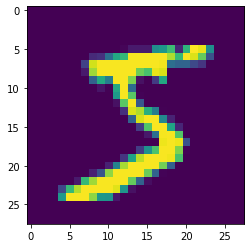

In [36]:
plt.imshow(train_images[0])

In [37]:
from tensorflow.keras import layers
from custom_layers import FourierConvLayer

In [38]:
fc_model = tf.keras.models.Sequential([
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [39]:
conv_model = tf.keras.models.Sequential([
    layers.Conv2D(256, kernel_size=(3,3), strides=1, activation='relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [40]:
fourier_conv_model = tf.keras.models.Sequential([
    layers.Flatten(),
    FourierConvLayer(256, autocast=False),
    FourierConvLayer(256, autocast=False),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [41]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

In [42]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')
test_images = (test_images - 127.5) / 127.5

In [43]:
fc_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
fc_history = fc_model.fit(train_images, train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2965 - accuracy: 0.9071
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1315 - accuracy: 0.9586
Epoch 3/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0954 - accuracy: 0.9701
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0814 - accuracy: 0.9733
Epoch 5/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0681 - accuracy: 0.9781
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0589 - accuracy: 0.9814
Epoch 7/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0525 - accuracy: 0.9826
Epoch 8/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0499 - accuracy: 0.9839
Epoch 9/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0431 - accuracy: 0.9856
Epoch 10/10
60

In [45]:
score = fc_model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08319612781077448
Test accuracy: 0.9773


In [46]:
conv_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
conv_history = conv_model.fit(train_images, train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.1809 - accuracy: 0.9456
Epoch 2/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0508 - accuracy: 0.9843
Epoch 3/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0365 - accuracy: 0.9890
Epoch 4/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0269 - accuracy: 0.9913
Epoch 5/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0212 - accuracy: 0.9934
Epoch 6/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0195 - accuracy: 0.9938
Epoch 7/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0166 - accuracy: 0.9944
Epoch 8/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0137 - accuracy: 0.9958
Epoch 9/10
60000/60000 [==============================] - 94s 2ms/sample - loss: 0.0128 - accuracy: 0.9958
Epoch 10/10
60

In [48]:
score = conv_model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03519043545449967
Test accuracy: 0.9911


In [50]:
fourier_conv_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
fourier_history = fourier_conv_model.fit(train_images, train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 959us/sample - loss: 0.2826 - accuracy: 0.9129
Epoch 2/10
60000/60000 [==============================] - 57s 955us/sample - loss: 0.0963 - accuracy: 0.9706
Epoch 3/10
60000/60000 [==============================] - 57s 956us/sample - loss: 0.0644 - accuracy: 0.9796
Epoch 4/10
60000/60000 [==============================] - 57s 956us/sample - loss: 0.0433 - accuracy: 0.9862
Epoch 5/10
60000/60000 [==============================] - 57s 956us/sample - loss: 0.0356 - accuracy: 0.9885
Epoch 6/10
60000/60000 [==============================] - 57s 955us/sample - loss: 0.0294 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 57s 956us/sample - loss: 0.0261 - accuracy: 0.9915
Epoch 8/10
60000/60000 [==============================] - 57s 955us/sample - loss: 0.0224 - accuracy: 0.9926
Epoch 9/10
60000/60000 [==============================] - 57s 955us/sample - loss: 0.0197 - accuracy: 0.9

In [52]:
score = fourier_conv_model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11795548995692341
Test accuracy: 0.9745


In [53]:
def fourierify(x):
    return np.asarray([np.fft.fft(sample) for sample in x])

In [54]:
fourier_test_images = fourierify(test_images)
fourier_train_images = fourierify(train_images)

In [55]:
fourier_fc_history = fc_model.fit(fourier_train_images, train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/sample - loss: 0.0342 - accuracy: 0.9886
Epoch 2/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0367 - accuracy: 0.9880
Epoch 3/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0327 - accuracy: 0.9889
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0281 - accuracy: 0.9907
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0317 - accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0255 - accuracy: 0.9913
Epoch 7/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0267 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0224 - accuracy: 0.9929
Epoch 9/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0230 - accuracy: 0.9923
Epoch 10/10
60

In [56]:
score = fc_model.evaluate(fourier_test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08507575669617472
Test accuracy: 0.9812


In [57]:
fourier_conv_history = conv_model.fit(fourier_train_images, train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0084 - accuracy: 0.9974
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0098 - accuracy: 0.9968
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0081 - accuracy: 0.9974
Epoch 4/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0062 - accuracy: 0.9979
Epoch 5/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0073 - accuracy: 0.9977
Epoch 6/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0048 - accuracy: 0.9984
Epoch 7/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0060 - accuracy: 0.9980
Epoch 8/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0055 - accuracy: 0.9981
Epoch 9/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0038 - accuracy: 0.9987
Epoch 10/10
60

In [58]:
score = conv_model.evaluate(fourier_test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.045186635401371994
Test accuracy: 0.991


In [59]:
def waveletify(x):
    scales = np.ones(1)
    wavelet = 'morl'
    wavelets = [pywt.cwt(sample, scales=scales, wavelet=wavelet) for sample in x]
    wavelets = np.asarray([s[0] for s in wavelets])
    return np.squeeze(wavelets, axis=1)

In [60]:
wavelet_test_images = waveletify(test_images)
wavelet_train_images = waveletify(train_images)

In [61]:
wavelet_fc_history = fc_model.fit(wavelet_train_images, train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2401 - accuracy: 0.9244
Epoch 2/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0956 - accuracy: 0.9698
Epoch 3/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0726 - accuracy: 0.9768
Epoch 4/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0579 - accuracy: 0.9813
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0497 - accuracy: 0.9837
Epoch 6/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0439 - accuracy: 0.9851
Epoch 7/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0384 - accuracy: 0.9870
Epoch 8/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0343 - accuracy: 0.9885
Epoch 9/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0315 - accuracy: 0.9890
Epoch 10/10
60

In [62]:
score = fc_model.evaluate(wavelet_test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07500712764759082
Test accuracy: 0.9783


In [63]:
wavelet_conv_history = conv_model.fit(wavelet_train_images, train_labels, epochs=10, batch_size=128)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0841 - accuracy: 0.9745
Epoch 2/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0192 - accuracy: 0.9939
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0123 - accuracy: 0.9961
Epoch 4/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0093 - accuracy: 0.9970
Epoch 5/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0066 - accuracy: 0.9979
Epoch 6/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0055 - accuracy: 0.9983
Epoch 7/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0071 - accuracy: 0.9977
Epoch 8/10
60000/60000 [==============================] - 96s 2ms/sample - loss: 0.0056 - accuracy: 0.9982
Epoch 9/10
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0033 - accuracy: 0.9988
Epoch 10/10
60

In [64]:
score = conv_model.evaluate(wavelet_test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.024734521689415867
Test accuracy: 0.9929
